In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D


data=pd.read_csv("C:/Users/shubhangipatil/Desktop/student-mat.csv")
print(data.shape)
data.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [14]:
#Getting linear relationships between G1,G2 and G3

#Collecting X and Y for linear regression

X = data['G1'].values
Y = data['G3'].values

#Getting the B and Bo values we have to calculate the mean values of X and Y

mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1, b0)

1.1062560947728453 -1.6528038288004812


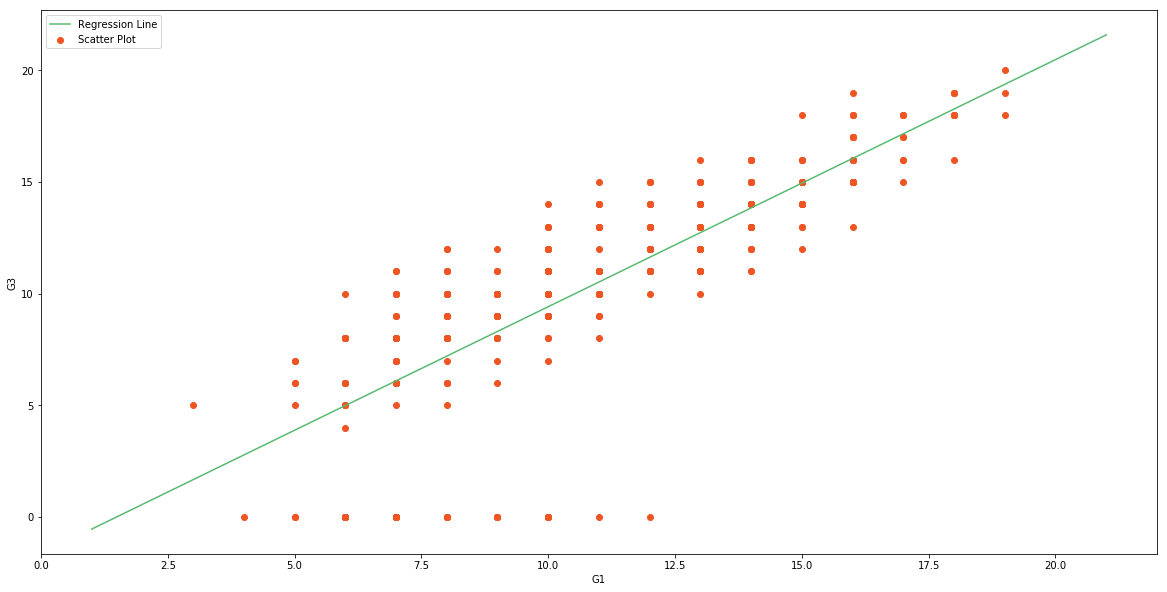

In [15]:
# Plotting Values and Regression Line

max_x = np.max(X) + 2
min_x = np.min(X) - 2

# Calculating line values x and y
x = np.linspace(min_x, max_x, 2)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('G1')
plt.ylabel('G3')
plt.legend()
plt.show()

In [16]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

2.7364052494659807


In [17]:
#R2 should be between 0 and 1
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

#It is 0.64 and the model representation is not so bad

0.6423508460522704


In [18]:
#Building the above linear regression model using scikit learn method

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

print(np.sqrt(mse))
print(r2_score)

2.7364052494659816
0.64235084605227


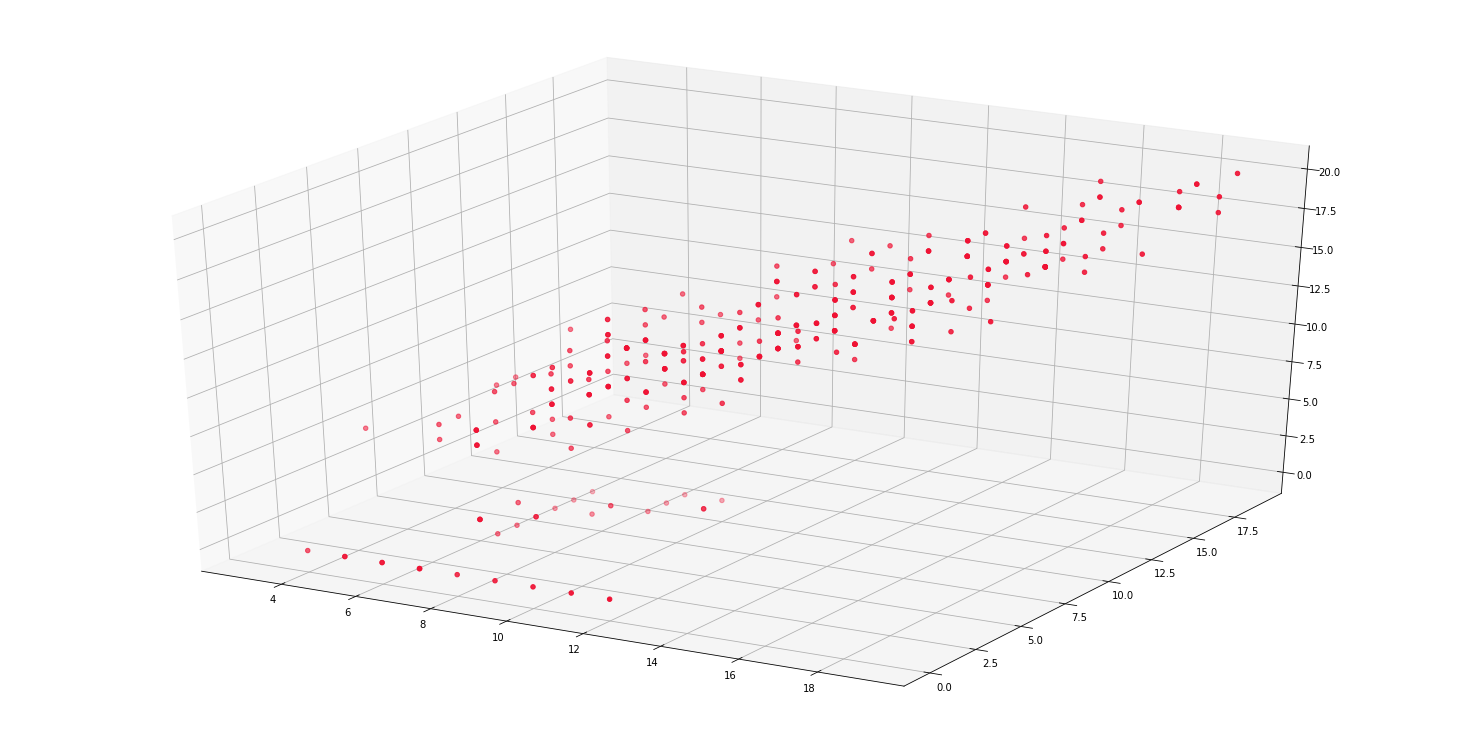

In [19]:
#Multiple linear regression

#Getting the scores into the array for analyzing G1 and G2 to predict G3

g1 = data['G1'].values
g2 = data['G2'].values
g3 = data['G3'].values

# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(g1, g2, g3, color='#ef1234')
plt.show()

In [20]:
#Generate X,Y and B values

m = len(g1)
x0 = np.ones(m)
X = np.array([x0, g1, g2]).T
# Initial Coefficients
B = np.array([0, 0, 0])
Y = np.array(g3)
alpha = 0.0001

In [21]:
#Defining cost function which shows the errors

def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [22]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

#Initial cost is low and thus needs to decrease using Gradient descent

64.70632911392406


In [23]:
#Using Gradient Descent method to minimize the errors and getting a learning rate

def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [24]:
# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[-1.03833486  0.08852322  0.98509942]
1.8881145945256979


In [25]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

1.9432522196182862
0.8196339820922387
